We'll be using Huggingface Datasets api to load data.

**Install Dependencies** 


In [ ]:
!pip install datasets

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

**Data**


https://paperswithcode.com/dataset/rvl-cdip

The RVL-CDIP dataset consists of scanned document images belonging to 16 classes such as letter, form, email, resume, memo, etc. The dataset has 320,000 training, 40,000 validation and 40,000 test images. The images are characterized by low quality, noise, and low resolution, typically 100 dpi.

**Import libraries**

In [ ]:
import pytesseract
import shutil
import os
import random
import matplotlib.pyplot as plt
try:
 from PIL import Image
except ImportError:
 import Image

**Load** rvl_cdip Dataset

In [ ]:
from datasets import load_dataset
rvl_cdip = load_dataset("rvl_cdip")

In [7]:
rvl_cdip

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 320000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 40000
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 40000
    })
})

In [8]:
rvl_cdip.keys()

dict_keys(['train', 'test', 'validation'])

Peek at a sample image

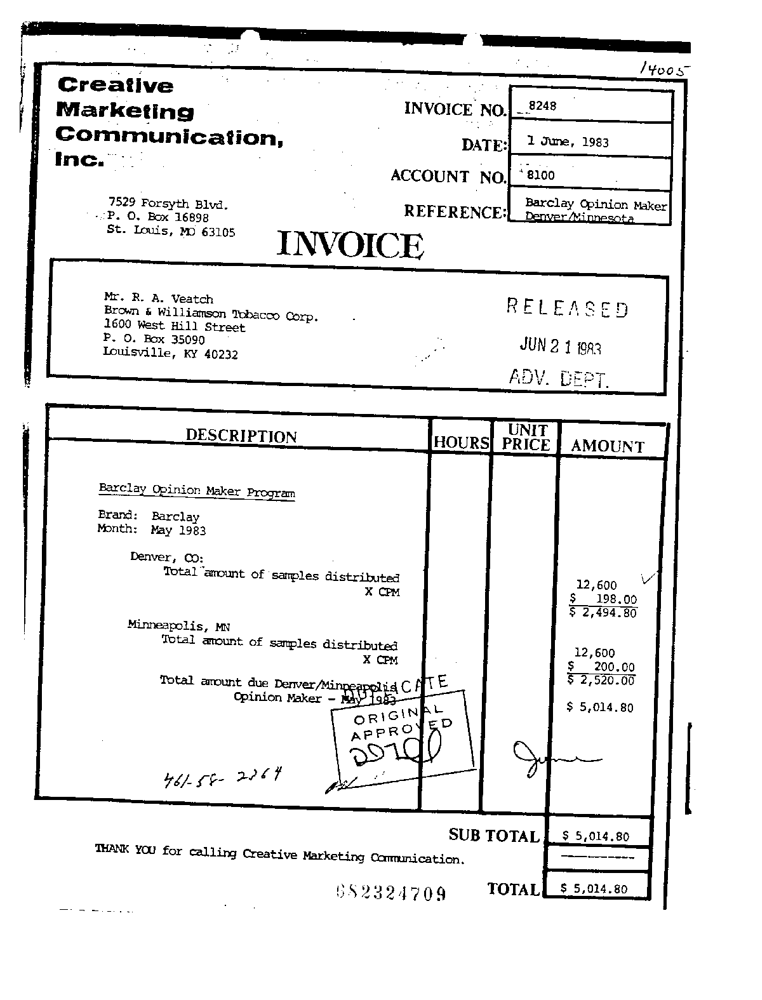

In [10]:
rvl_cdip['train'][0]['image']

In [21]:
image_path_in_colab=rvl_cdip['train'][0]['image']

In [26]:
extractedInformation = pytesseract.image_to_string(image_path_in_colab)
print(extractedInformation)

Creative
Marketing
Communication,
Inc.

7529 Forsyth Blvd. REFERENCE;
P.O, Box 16898

Sino TNVOICE

Mr. R.A. Veatch
Brown & Williamson Mbacco Corp,
1600 West Hill Street

P.O. Box 35090

Iouisville, Ky 40232

UNIT
HOU PRICE | AMOUNT

Baxclay Qpinion Meker Program
Barclay Opinion Meker Pre
Brand: Barclay
Month: May 2983,
Denver, 00: Vv
Total ‘arount of samples distributed 22,600
x cH § ‘198.09
52,434-80
Minneapolis, mv
‘Total aount of samples distributed 12,600
$_'200.00
$2,520.00
‘opi C $ 5,014.80
qo

SUB TOTAL
THANK YOU for calling Creative Marketing Conmunication.

B82

 



**Parallelize**

Lets work with 100 images

In [43]:
sample = rvl_cdip['train'][:100]['image']

In [44]:
import multiprocessing
import time

In [45]:
def ocr(image):
  return pytesseract.image_to_string(image) 

In [46]:
pool = multiprocessing.Pool()

In [47]:

res_async = [pool.apply_async(ocr,args= (i,) ) for i in sample]
res = [r.get() for r in res_async]
res

["Creative\n{ Marketing\nCommunication,\n\nInc.\n\n7529 Forsyth Blvd. REFERENCE;\nP.O, Box 16898\n\nSino TNVOICE\n\nMr. R.A. Veatch\nBrown & Williamson Mbacco Corp,\n1600 West Hill Street\n\nP.O. Box 35090\n\nIouisville, Ky 40232\n\nUNIT\nHOU PRICE | AMOUNT\n\nBaxclay Qpinion Meker Program\nBarclay Opinion Meker Pre\nBrand: Barclay\nMonth: May 2983,\nDenver, 00: \\\nTotal ‘arount of samples distributed\nx cH 198.00\n52,434-80\nMinneapolis, mv\n‘Total aount of samples distributed 12,600\nx CH $_'200.00\n. $2,520.00\n‘opi C $ 5,014.80\n\nSUB TOTAL,\n\nTHANK YOU for calling Creative Marketing Conmunication.\n\n| J\n24709 TOTAL ss.014.00_|\n\n       \n\nB82\n\n \n\x0c",
 'Lorillard lesporne\nFob ,17T =\n\n   \n\nA) : Table 2\n\n \n\nDarby Model Modified Yodel\n- Nicotine half- Nicotine halt- /\nLife (10 min); Life (40mis.);\nGotinine halé~ cotinine haif-\n| Assumed Amt. - life (1800 Assumed amt. lige (1140\nof Nicotine ~ ain.) of Nicotine min.)\nAbsorbed fron Estinated ——— ASsorbed from Es